# Ford GoBike Trip Data Analysis 

In this part of project, our goal is to conduct an exploratory data analysis on ___Ford GoBike Trip dataset___.
We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships, but it does not need to be clean or perfect. This part of the project is gives opportunity to ask questions on data and make discoveries.

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Explanatory data analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

The ___Ford GoBike Trip dataset___ includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay & nearby areas. Each trip is anonymized and includes:

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    Member Year of Birth
    Member Gender

## Python data science and data visualization libraries

In [1]:
# set up import statements for all of the packages 
import pandas as pd
import numpy as np
import math
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set_context(font_scale=1.0, rc={"lines.linewidth": 1.0})
sns.set_style('darkgrid')
# plt.style.use('fivethirtyeight')
# visualizations see this page for more: http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
# Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean dataset for analysis. 


<a id='data'></a>
## Gather data for the project

In this project, I choose a dataset from the <a href = "https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True">Dataset Options</a> document. The dataset page <a href="https://www.fordgobike.com/system-data">Ford GoBike System Data</a>, provides link to download data. 

I have downloaded __"201812-fordgobike-tripdata.csv"__


In [2]:
# load dataset
df = pd.read_csv("201812-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No


<a id='prop'></a>
## General properties

In [3]:
df.shape

(131363, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131363 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               131363 non-null int64
start_time                 131363 non-null object
end_time                   131363 non-null object
start_station_id           131171 non-null float64
start_station_name         131171 non-null object
start_station_latitude     131363 non-null float64
start_station_longitude    131363 non-null float64
end_station_id             131171 non-null float64
end_station_name           131171 non-null object
end_station_latitude       131363 non-null float64
end_station_longitude      131363 non-null float64
bike_id                    131363 non-null int64
user_type                  131363 non-null object
member_birth_year          126352 non-null float64
member_gender              126352 non-null object
bike_share_for_all_trip    131363 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 16.0+ MB


In [5]:
print(sum(df.duplicated()))

0


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,131363.000000,131171.000000,131363.000000,131363.000000,131171.000000,131363.000000,131363.000000,131363.000000,126352.000000
mean,770.675365,132.167346,37.765679,-122.350232,130.045696,37.765821,-122.349782,3174.437566,1983.684390
std,1750.519849,109.716315,0.106910,0.124425,109.560874,0.106766,0.123923,1698.973870,10.491775
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1888.000000
25%,337.000000,41.000000,37.770083,-122.411901,36.000000,37.770407,-122.411647,1696.000000,1978.000000
50%,536.000000,97.000000,37.780955,-122.398436,93.000000,37.781010,-122.398285,3249.000000,1986.000000
75%,839.000000,211.000000,37.795392,-122.291209,203.000000,37.795393,-122.291376,4816.000000,1991.000000
max,86039.000000,381.000000,37.880222,-121.874119,381.000000,37.880222,-121.874119,6234.000000,2000.000000


__Observations:__
    1. Columns names are consistent (lower snakecase)
    2. Generate minutes for trip duration from duration_sec 
    3. Stripping time from the start_time & end_time column will make the dataset easier to work with 
    4. Calculate the distance for trip using geo location data
    5. Filter data to include reasonable member age range from member_year_of_birth
    6. Create bins for member age group

<a id='clean'></a>
## Cleaning data for the project

In [7]:
# Generate minutes for trip duration from duration_sec 
df['duration_min'] = df['duration_sec']/60

In [8]:
# Stripping time from the start_time & end_time column will make the dataset easier to work with 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_time_date'] = df['start_time'].dt.date
df['end_time_date'] = df['end_time'].dt.date

# month and date
df['start_time_month_date'] = df['start_time'].map(lambda x: x.strftime('%m-%d'))
df['end_time_month_date'] = df['end_time'].map(lambda x: x.strftime('%m-%d'))

df['start_time_hour_minute'] = df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute'] = df['end_time'].map(lambda x: x.strftime('%H-%m'))

df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

df['start_time_weekday_abbr'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])


In [9]:
# Calculate the distance for trip using geo location data
def measure_distance(source, destination):
    """
    Calculate the Haversine distance.

    Arguments:
        origin : tuple of float (lat, long)
        destination : tuple of float (lat, long)
        
    Returns:
        distance_in_km : float
    """
    lat1, lon1 = source
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c

    return distance

# apply above function for distance calculation
df['distance_km_estimates'] = df.apply(lambda x: measure_distance
                                       ((x['start_station_latitude'], x['start_station_longitude']),
                                        (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df['distance_miles_estimates'] = df['distance_km_estimates']*0.621371
df.drop('distance_km_estimates', axis=1, inplace=True)

In [10]:
# Filter data to include reasonable member age range from member_year_of_birth
df['member_age'] = 2018-df['member_birth_year']

In [11]:
# check outliers
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    126352.000000
mean         34.315610
std          10.491775
min          18.000000
10%          23.000000
20%          26.000000
30%          28.000000
40%          30.000000
50%          32.000000
60%          34.000000
70%          37.000000
75%          40.000000
80%          42.000000
90%          50.000000
95%          55.000000
max         130.000000
Name: member_age, dtype: float64

Text(0.5,0,'Age of bike riders')

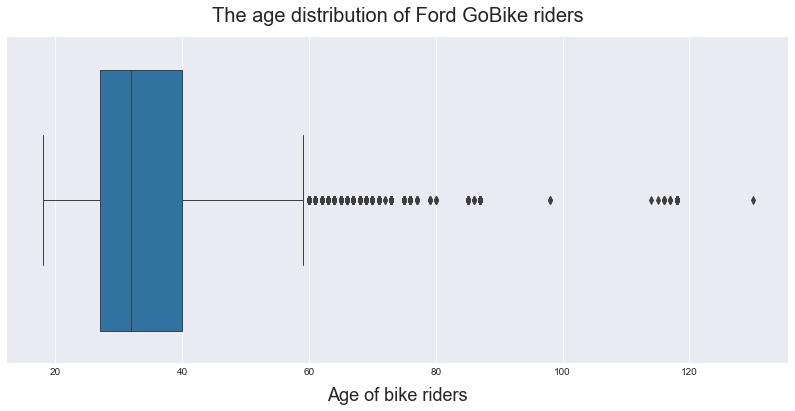

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, orient='h')
plt.title("The age distribution of Ford GoBike riders", fontsize=20, y=1.03)
plt.xlabel("Age of bike riders", fontsize=18, labelpad=10)

There are outliers. Age from 18 to 55 takes 95% of the users. So, it's logical to remove users more than 60 years old. There were users more than 100 years old. I think they allow users to put some unusual birth year.

In [13]:
df = df[df['member_age']<=60]
df['member_age'].mean()

33.64831705545242

In [14]:
# Create bins for member age group
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [15]:
# set output width to visualize all columns
pd.set_option("display.max_columns",df.shape[1]+1)
# Check & Confirm all changes
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_time_date,end_time_date,start_time_month_date,end_time_month_date,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday_abbr,distance_miles_estimates,member_age,member_age_bins
1,63587,2018-12-31 19:00:32.121,2019-01-01 12:40:19.366,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No,1059.783333,2018-12-31,2019-01-01,12-31,01-01,19-12,12-01,19,12,Mon,0.000000,23.0,20 - 30
2,64169,2018-12-31 15:09:01.082,2019-01-01 08:58:30.091,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No,1069.483333,2018-12-31,2019-01-01,12-31,01-01,15-12,08-01,15,8,Mon,0.000000,30.0,20 - 30
3,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.793,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes,509.166667,2018-12-31,2019-01-01,12-31,01-01,19-12,03-01,19,3,Mon,0.364301,32.0,30 - 40
5,2149,2018-12-31 23:59:11.882,2019-01-01 00:35:01.685,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,5549,Subscriber,1982.0,Male,Yes,35.816667,2018-12-31,2019-01-01,12-31,01-01,23-12,00-01,23,0,Mon,0.806263,36.0,30 - 40
6,2502,2018-12-31 23:46:24.943,2019-01-01 00:28:07.356,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,4706,Customer,1973.0,Male,No,41.700000,2018-12-31,2019-01-01,12-31,01-01,23-12,00-01,23,0,Mon,0.936852,45.0,40 - 50


In [16]:
# Store the master csv
df.to_csv("master_201812-fordgobike-tripdata.csv")

<a id='eda'></a>
# Exploratory data analysis

Find relationships, ask questions, compute statistics and create visualizations.

## Question 1:  How fast the Ford GoBike is growing?

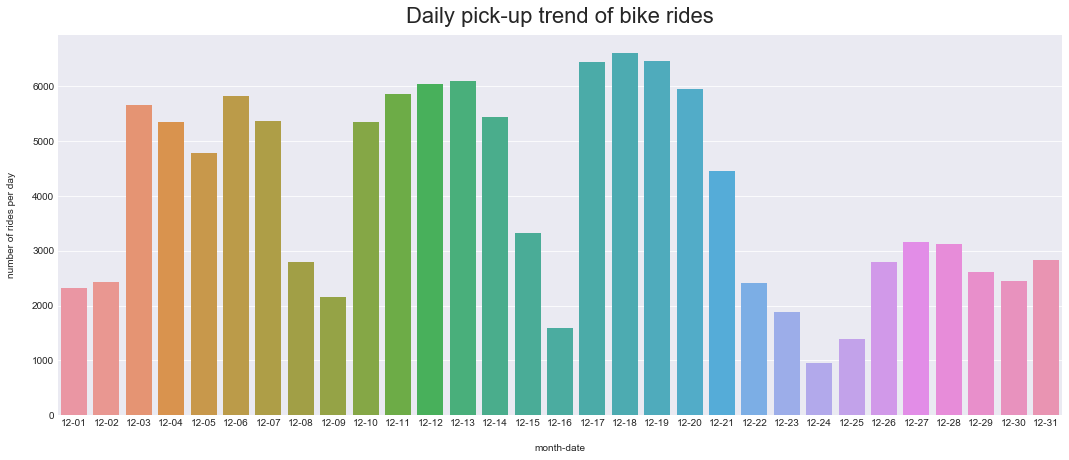

In [17]:
plt.figure(figsize=(18,7))
sns.countplot(x='start_time_month_date', data=df.sort_values(by='start_time_month_date'))
plt.title('Daily pick-up trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('month-date', labelpad=16)
plt.ylabel('number of rides per day', labelpad=16)
ax = plt.gca()

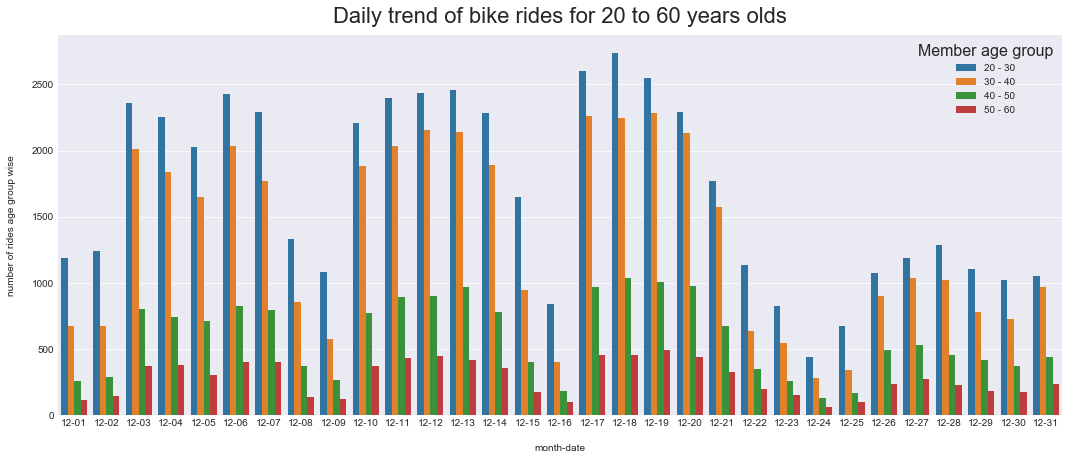

In [18]:
plt.figure(figsize=(18,7))
ax = sns.countplot(x='start_time_month_date', hue='member_age_bins', 
                   data=df[df['member_age_bins'].isin(
                       ['20 - 30', '30 - 40', '40 - 50', '50 - 60'])].sort_values(
                       by=['start_time_month_date', 'member_age_bins']))
plt.title('Daily trend of bike rides for 20 to 60 years olds', fontsize=22, y=1.015)
plt.xlabel('month-date', labelpad=16)
plt.ylabel('number of rides age group wise', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()

> 20-30 age group users are rapidly using bikes as compared to other user groups

## Question 2: How does rides trend vary per age, gender, weekday, and hour of a day?

### Bike rides per member age group

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

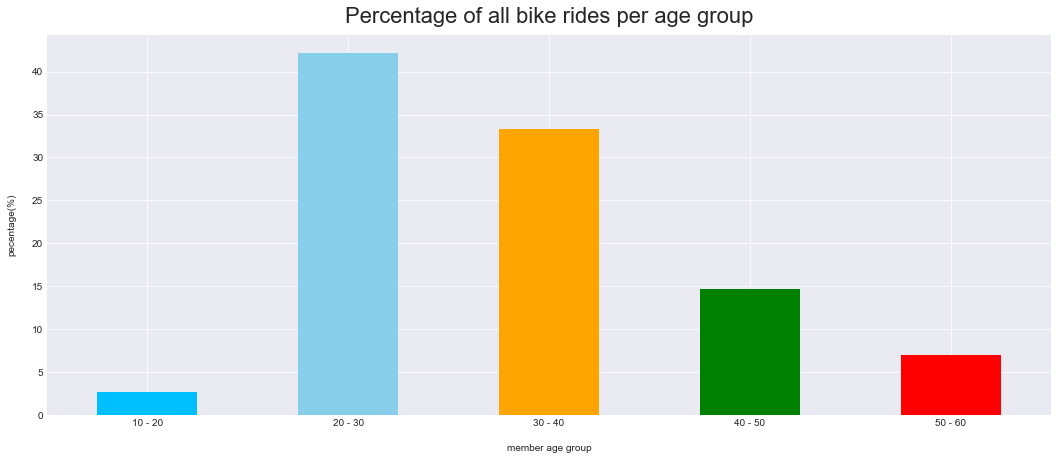

In [19]:
trip_by_age_df = df.groupby('member_age_bins').agg({'bike_id':'count'})

trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100

new_color = ['deepskyblue', 'skyblue', 'orange', 'green', 'red']
trip_by_age_df['perc'].plot(kind='bar',color=new_color, figsize=(18,7))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%)', labelpad=16)
plt.xticks(rotation=360)

> 20 to 40 years old people took the more than 70% of bike rides. Among those, 20 to 30 years old people's rides account for around 40% of all bike rides.

### Bike rides per gender

(0, 100)

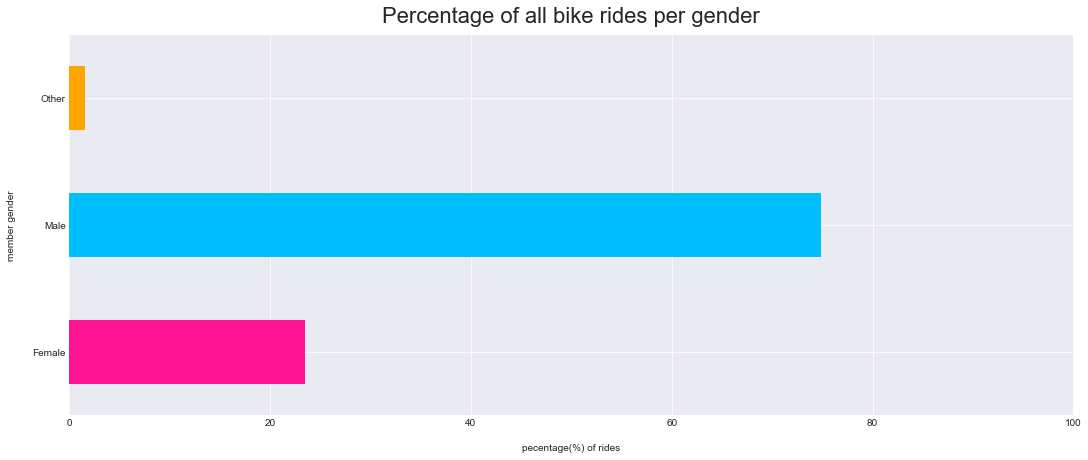

In [20]:

trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

new_color = ['deeppink', 'deepskyblue', 'orange']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(18,7))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) of rides', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

> Male took 76% of all bike rides, and female took 22% of them.

### Bike rides per weekday

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

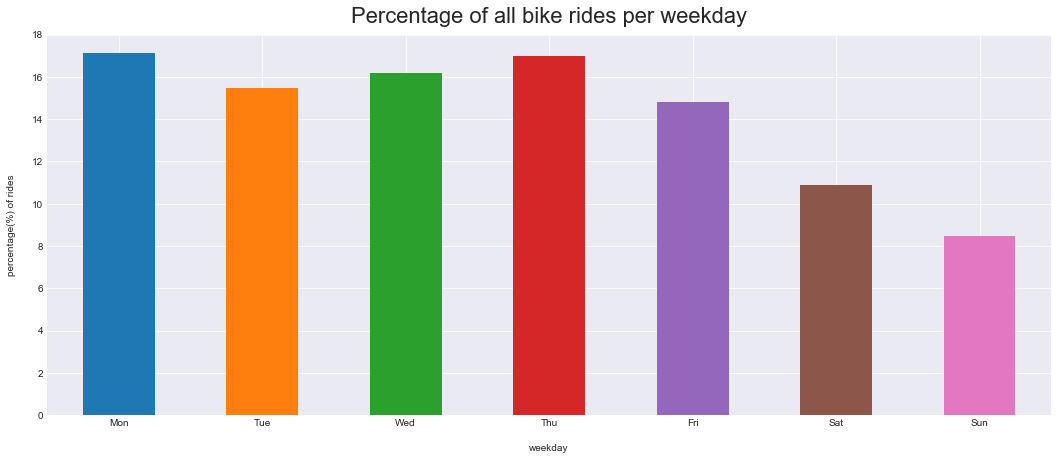

In [21]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})

trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', figsize=(18,7), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) of rides', labelpad=16)
plt.xticks(rotation=360)

> Majority of people uses Ford Gobike on weekdays. And reduced to half on weekends.

### Bike rides per hours of the day

Text(0,0.5,'percentage(%) of rides')

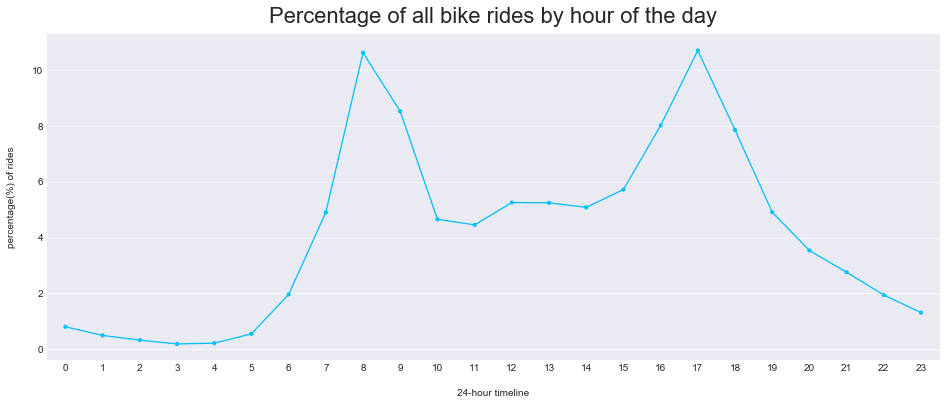

In [22]:
trip_by_hour_df = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

plt.figure(figsize=(16,6))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='deepskyblue', data=trip_by_hour_df)
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('24-hour timeline', labelpad=16)
plt.ylabel('percentage(%) of rides', labelpad=16)

> Majority number of people uses this service during commute time. 8am and 5pm are the peak hours for this service. Also, few people uses it more during lunch time.

## Question 3: How does subscribers and customers behave differently?

### Percentage bike rides per user type

(0, 100)

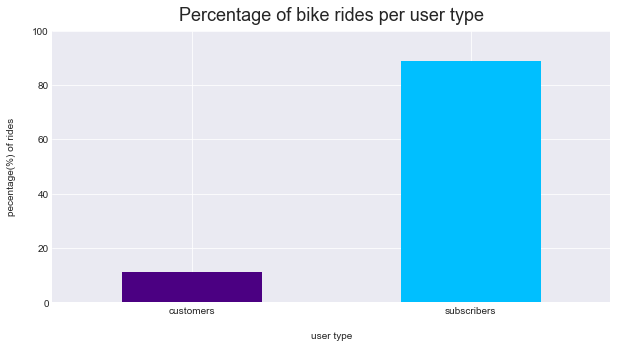

In [23]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')

user_type = count_of_rides_per_user_type['count']/len(df)*100

new_color = ['indigo', 'deepskyblue']
user_type.plot(kind='bar', color=new_color, figsize=(10,5))
plt.title('Percentage of bike rides per user type', fontsize=18, y=1.015)
plt.ylabel('pecentage(%) of rides', labelpad=16)
plt.xlabel('user type', labelpad=16)
plt.xticks(np.arange(2), ('customers', 'subscribers'), rotation=360)
plt.ylim(0,100)

> 88.92% of bike rides are from subscribers.

### Trend of bike rides per user type

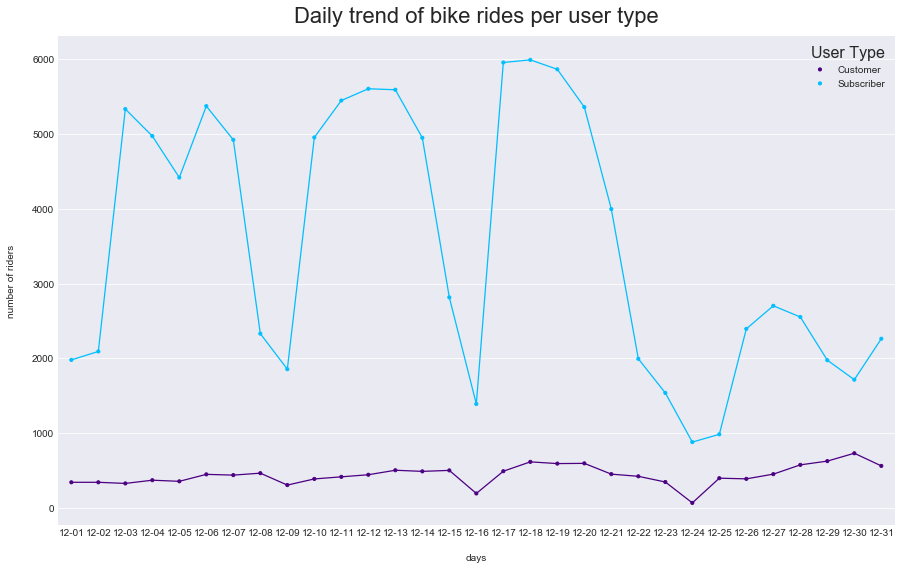

In [24]:
user_type_count_per_year_df = df.groupby(["start_time_month_date", "user_type"]).size().reset_index()

plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'deepskyblue', 'Customer':'indigo'}
ax = sns.pointplot(x='start_time_month_date', y=0, hue='user_type', 
                   palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('Daily trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('days', labelpad=16)
plt.ylabel('number of riders', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()

> The fluctuations in Subscriber profile is because of weekends.

### Average trip duration per user type

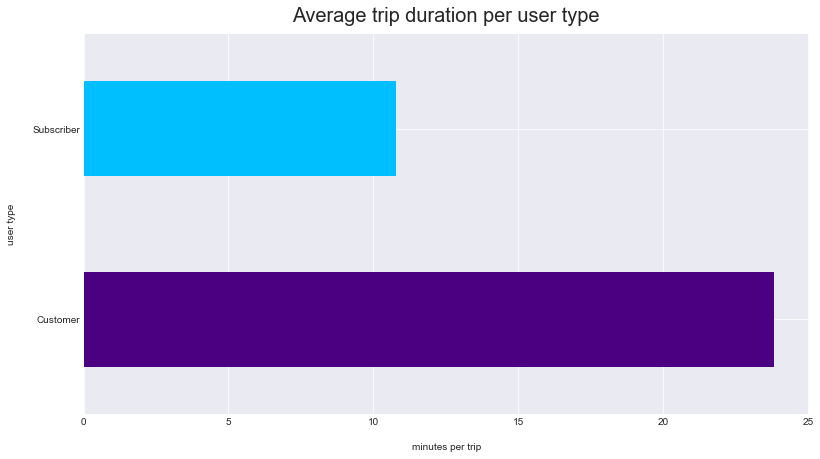

In [25]:
new_color=['indigo', 'deepskyblue']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes per trip', labelpad=16)
ax = plt.gca()

In [26]:
df.groupby('user_type')['duration_min'].mean()

user_type
Customer      23.846594
Subscriber    10.769067
Name: duration_min, dtype: float64

> Average trip duration for Subscriber is 10.769067 and for Customer is 23.846594.

### Average trip distance per user type

Text(0.5,0,'miles [distance]')

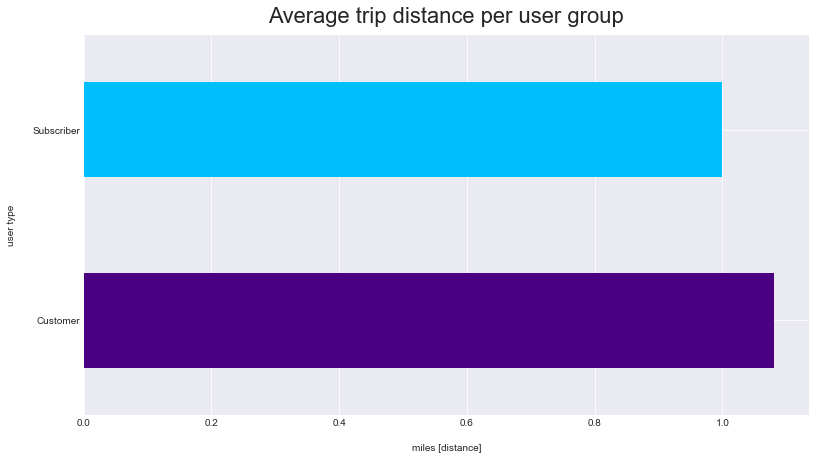

In [27]:
ax = df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip distance per user group', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles [distance]', labelpad=16)

In [28]:
df.groupby('user_type')['distance_miles_estimates'].mean()

user_type
Customer      1.081566
Subscriber    0.999852
Name: distance_miles_estimates, dtype: float64

> Interestingly, both subscribers and customers trip distance were almost same.

### Trend of Subscribers bike rides per age group

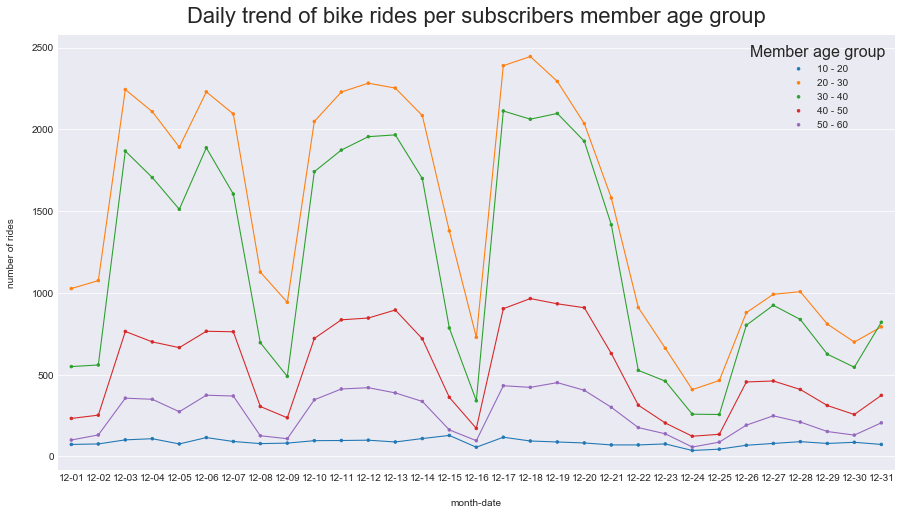

In [29]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(
    ['start_time_month_date', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()
plt.figure(figsize=(15,8))
ax = sns.pointplot(x='start_time_month_date', y='bike_id', hue='member_age_bins', scale=.6, data=subscriber_age_df)
plt.title("Daily trend of bike rides per subscribers member age group", fontsize=22, y=1.015)
plt.xlabel('month-date', labelpad=16)
plt.ylabel('number of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()

### Trend of Customers bike rides per age group

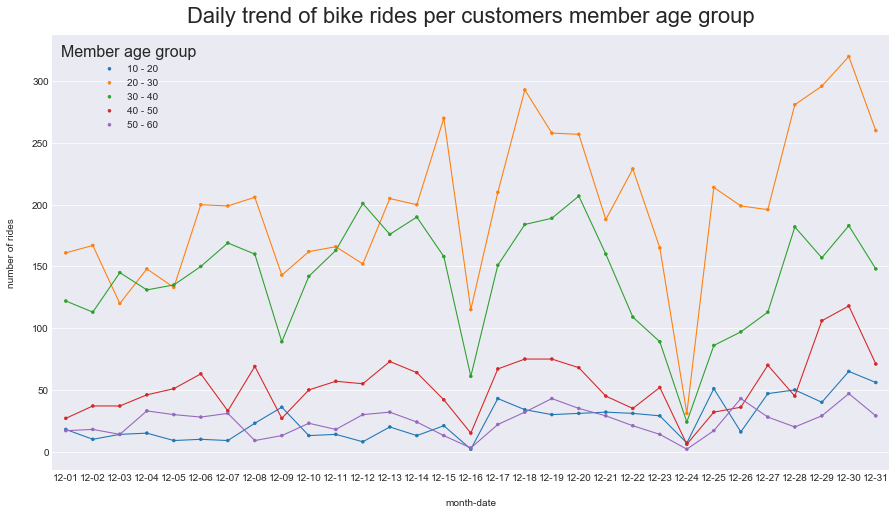

In [30]:
customer_age_df = df[df['user_type']=='Customer'].groupby(
    ['start_time_month_date', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()
plt.figure(figsize=(15,8))
ax = sns.pointplot(x='start_time_month_date', y='bike_id', hue='member_age_bins', scale=.6, data=customer_age_df)
plt.title("Daily trend of bike rides per customers member age group", fontsize=22, y=1.015)
plt.xlabel('month-date', labelpad=16)
plt.ylabel('number of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()

> 20-30 age group riders are more in both user type

## Question 4: Which docks are used more frequently?

### Top 10 stations where most Ford GoBike's trip starts

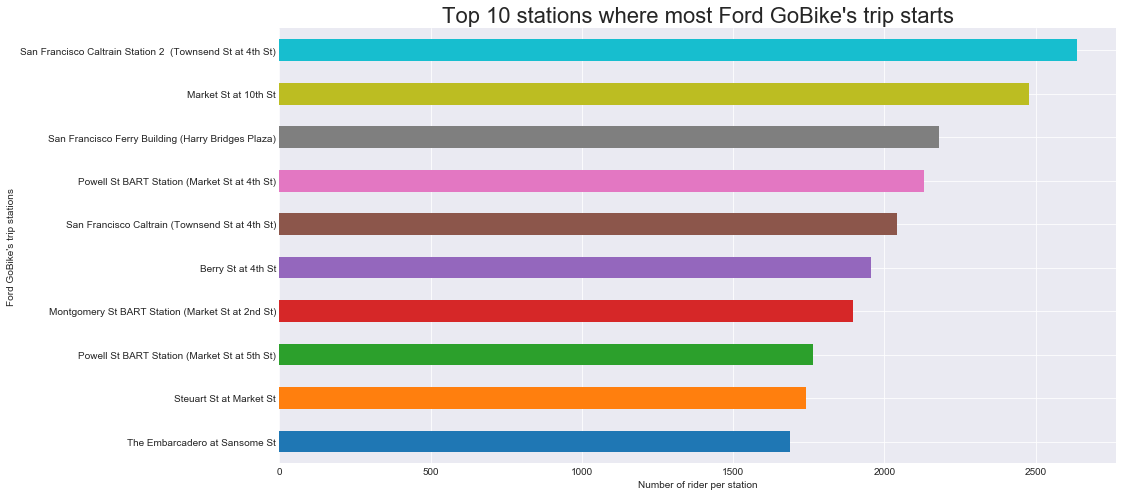

In [31]:
start_stn = df["start_station_name"].value_counts().nlargest(10)

fig = plt.figure(figsize=(15,8))
start_stn.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 stations where most Ford GoBike's trip starts",fontsize=22)
plt.ylabel("Ford GoBike's trip stations")
plt.xlabel("Number of rider per station");

### Top 10 stations where most Ford GoBike's trip ends

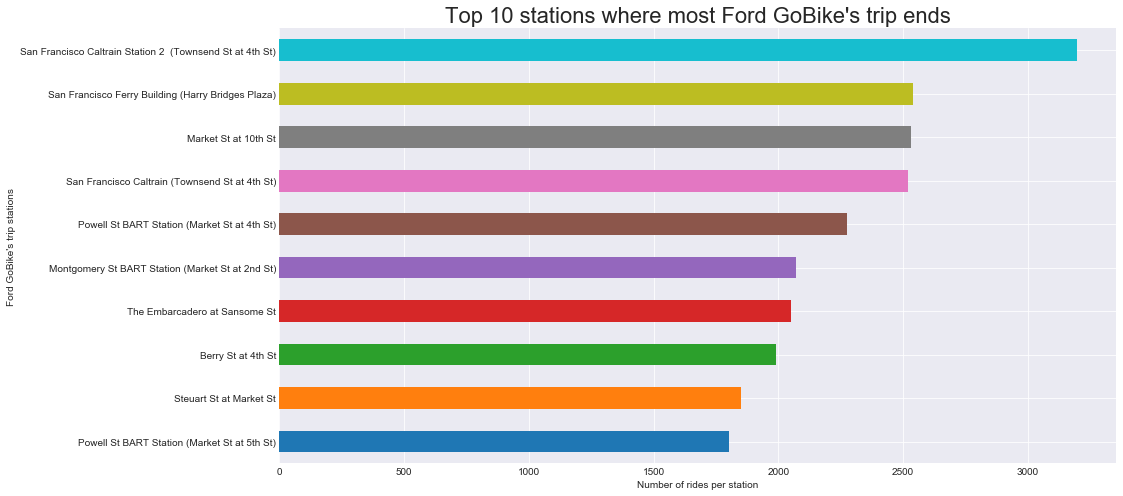

In [32]:
end_stn = df["end_station_name"].value_counts().nlargest(10)

fig = plt.figure(figsize=(15,8))
end_stn.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 stations where most Ford GoBike's trip ends",fontsize=22)
plt.ylabel("Ford GoBike's trip stations")
plt.xlabel("Number of rides per station");

> San Francisco Caltrain Station 2 (Townsend St at 4th St) is the top station where Ford Gobike trip starts and ends.

## Question 5: When and where bike share for all rides happened ?

Text(0,0.5,'number of bike share trips')

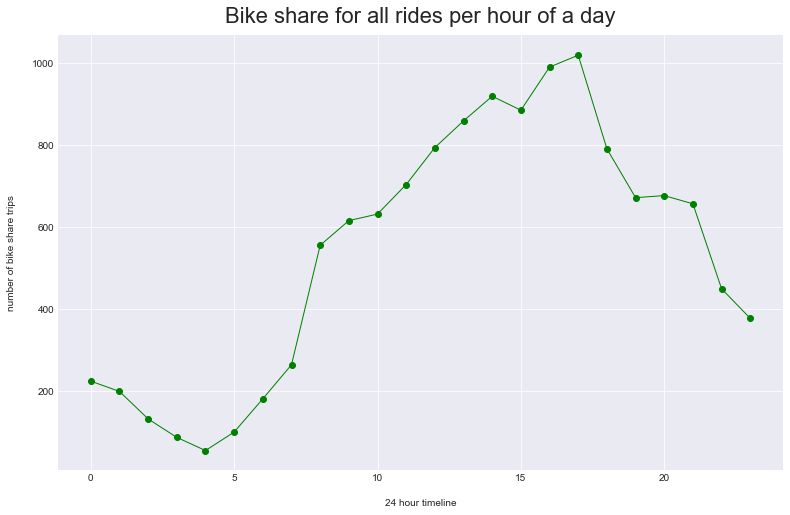

In [33]:
df[df['bike_share_for_all_trip']=='Yes'].groupby('start_time_hour').agg(
    {'bike_id':'count'}).plot(style='-o', figsize=(13,8), color='green', legend=False)
plt.title("Bike share for all rides per hour of a day", fontsize=22, y=1.015)
plt.xlabel('24 hour timeline', labelpad=16)
plt.ylabel('number of bike share trips', labelpad=16)

>  5pm is peak hour for 'Bike share for all' rides

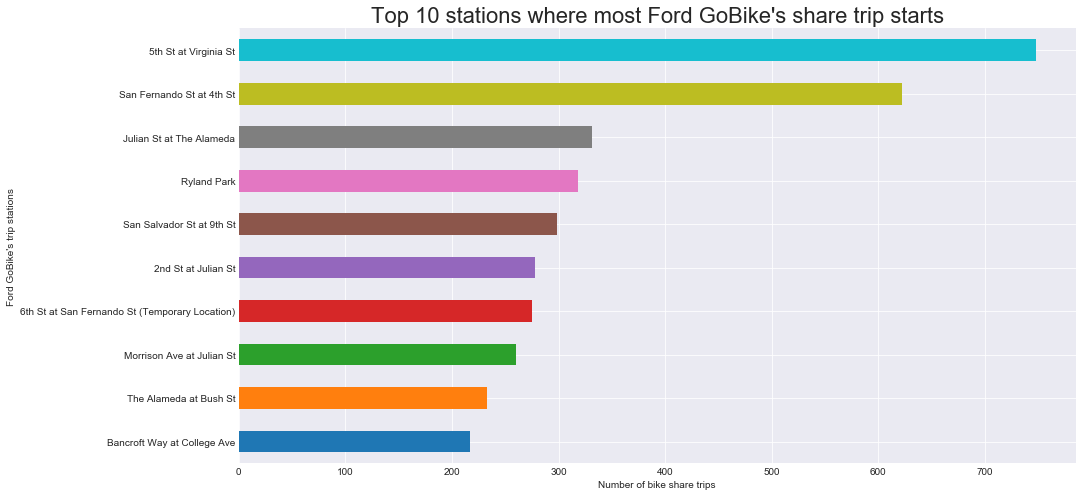

In [34]:
share_str_stn = df.query("bike_share_for_all_trip == 'Yes'")['start_station_name'].value_counts().nlargest(10)

fig = plt.figure(figsize=(15,8))
share_str_stn.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 stations where most Ford GoBike's share trip starts",fontsize=22)
plt.ylabel("Ford GoBike's trip stations")
plt.xlabel("Number of bike share trips");

> Most bike share for trip starts at 5th St. at Virginia St.

<a id="conclusions"></a>
# Conclusion

1. 20-30 age group users are rapidly using bikes as compared to other user groups

2. 20 to 40 years old people took the more than 70% of bike rides. Among those, 20 to 30 years old people's rides account for around 40% of all bike rides.

3. Male took 76% of all bike rides, and female took 22% of them.

4. Majority of people uses Ford Gobike on weekdays. And reduced to half on weekends.

5. Majority number of people uses this service during commute time. 8am and 5pm are the peak hours for this service. Also, few people uses it more during lunch time.

6. 88.92% of bike rides are from subscribers.

7. The fluctuations in Subscriber profile is because of weekends.

8. Average trip duration for Subscriber is 10.769067 and for Customer is 23.846594.

9. Interestingly, both subscribers and customers trip distance were almost same.

10. 20-30 age group riders are more in both user type.

11. San Francisco Caltrain Station 2 (Townsend St at 4th St) is the top station where Ford Gobike trip starts and ends.

12. 5pm is peak hour for 'Bike share for all' rides

13. Most bike share for trip starts at 5th St. at Virginia St.

